<a href="https://colab.research.google.com/github/kadarishiva/Amazon-food-Reviews/blob/main/Big_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-T:o-End NLP Pipeline for Amazon food Reviews.

I'm constructing an NLP Pipeline for Amazon food evaluations. Amazon needs to know about food product reviews and rating scores in order to improve product quality. With the use of this pipeline, Amazon can discover how the sentiment of customer reviews varies across different food products and how customer reviews can help forecast food product ratings.

Dataset reference: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn.model_selection
from sklearn import svm
import sklearn.tree as DecisionTreeClassifier
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from imblearn.over_sampling import SMOTE
import sklearn.neural_network
import sklearn.ensemble

Imported the requird packages to carry out the operations.

In [ ]:
df = pd.read_csv("/content/Reviews.csv", low_memory=False )
df = df.sample(n=5000)
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(5000, 12)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Unnamed: 10,Unnamed: 11
0,552407,B0007OPW5C,A1B495BL1P3SNC,Y. Kim,5,18,4,1150329600,GREAT SHIPPINGG,"the shipping was great, the seller is AWESOME ...",NaN,NaN
1,499896,B009B87SAC,A24SLSJXS37KDL,Judy Fields,0,0,5,1334188800,Hills Science Diet Oral Care,My cat loves this cat food! He likes the big c...,NaN,NaN
2,174592,B004727PFK,A1Y6YLMUA88TV7,J. Shaath,4,4,5,1303430400,GF Spaghetti-O's,I love this product. I have tried multiple pa...,NaN,NaN
3,48230,B004SRH2B6,A30Y6933LWCQTH,Dragon Slayer,0,7,1,1290902400,"This is coconut ""water"" not ""juice"".",I misread the label. I was looking for real j...,NaN,NaN
4,514531,B000CQ6KTM,A29YHQ98XH1KD6,Johnny Os,2,4,5,1199577600,Best organic Mac & Cheese around,My local grocer always sells out of this stuff...,NaN,NaN


The pandas package was used to load the dataset. My original dataset has 568454 rows, which is quite enormous. Due to computational constraints, I am only considering 5000 samples.

## Data preprocessing

In [ ]:
df.isna().sum()

Id                           0
ProductId                    0
UserId                       0
ProfileName                  0
HelpfulnessNumerator         0
HelpfulnessDenominator       0
Score                        0
Time                         0
Summary                      0
Text                         0
Unnamed: 10               5000
Unnamed: 11               5000
dtype: int64

Checking for null values

In [ ]:
df = df.drop(["Unnamed: 10", "ProductId", "Unnamed: 11", "UserId"], axis=1)

In [ ]:
df = df.dropna()

I'm dropping Unnamed 10 and Unnamed 11 because they don't include any information. I have opted to remove a few more features that aren't necessary for this examination and dropprd null values.

In [ ]:
df.isna().sum()

Id                        0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
print(df.shape)

(5000, 8)


In [ ]:
df.head()

,Id,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,552407,Y. Kim,5,18,4,1150329600,GREAT SHIPPINGG,"the shipping was great, the seller is AWESOME ..."
1,499896,Judy Fields,0,0,5,1334188800,Hills Science Diet Oral Care,My cat loves this cat food! He likes the big c...
2,174592,J. Shaath,4,4,5,1303430400,GF Spaghetti-O's,I love this product. I have tried multiple pa...
3,48230,Dragon Slayer,0,7,1,1290902400,"This is coconut ""water"" not ""juice"".",I misread the label. I was looking for real j...
4,514531,Johnny Os,2,4,5,1199577600,Best organic Mac & Cheese around,My local grocer always sells out of this stuff...


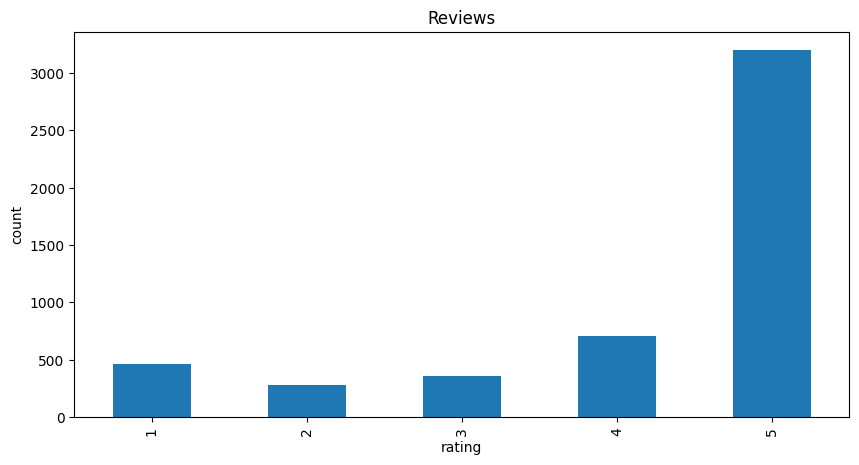

In [ ]:
reviews = df['Score'].value_counts().sort_index()
reviews.plot(kind='bar',title='Reviews', figsize=(10, 5))
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

Plotting the ratings of the products.

## NLTK

In [ ]:
word = df['Text'][50]
print(word)

Well, I suppose if you don't like spicy food, these might not be your thing. And if you don't like wonderfully tasty, crispy (and healthy!) snacks, they might not be your thing either!<br /><br />But I'm guessing you already passed these by if you fall into the former category, and I'm guessing not many people fit into the latter.<br /><br />My only complaint with these is that the wasabi coating seems to be slightly variable on them, as in I'll have one piece that's moderately hot, and then another that's really not at all. These are horribly addictive too, so it's not like I can just eat a couple of them anyways! They're fairly healthy, which makes me not feel as bad about sucking down a whole pack, but my wallet is more of a limiting factor than my appetite on buying these damn things!<br /><br />In short, these are tasty but moderately spicy. If you like wasabi, you'll love them. If you like seaweed (in whatever form; seaweed salad, on/around your sushi, etc), you'll love them. If 

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokens = nltk.word_tokenize(word)
tokens[:15]

['Well',
 ',',
 'I',
 'suppose',
 'if',
 'you',
 'do',
 "n't",
 'like',
 'spicy',
 'food',
 ',',
 'these',
 'might',
 'not']

Tokenization of the 50th row is being reviewed. The first 15 words of the review are displayed.


In [ ]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:15]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Well', 'RB'),
 (',', ','),
 ('I', 'PRP'),
 ('suppose', 'VBP'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('spicy', 'NN'),
 ('food', 'NN'),
 (',', ','),
 ('these', 'DT'),
 ('might', 'MD'),
 ('not', 'RB')]

Downloaded the required pre-trained models. The method extracts a specific text from a Data Frame, tokenizes it into individual words, tags the tokens with part-of-speech tags.

In [ ]:
nltk.download('words')
nltk.download('maxent_ne_chunker')
entities = nltk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


(S
  Well/RB
  ,/,
  I/PRP
  suppose/VBP
  if/IN
  you/PRP
  do/VBP
  n't/RB
  like/VB
  spicy/NN
  food/NN
  ,/,
  these/DT
  might/MD
  not/RB
  be/VB
  your/PRP$
  thing/NN
  ./.
  And/CC
  if/IN
  you/PRP
  do/VBP
  n't/RB
  like/VB
  wonderfully/RB
  tasty/JJ
  ,/,
  crispy/NN
  (/(
  and/CC
  healthy/JJ
  !/.
  )/)
  snacks/NNS
  ,/,
  they/PRP
  might/MD
  not/RB
  be/VB
  your/PRP$
  thing/NN
  either/RB
  !/.
  </NN
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  But/CC
  I/PRP
  'm/VBP
  guessing/VBG
  you/PRP
  already/RB
  passed/VBN
  these/DT
  by/IN
  if/IN
  you/PRP
  fall/VBP
  into/IN
  the/DT
  former/JJ
  category/NN
  ,/,
  and/CC
  I/PRP
  'm/VBP
  guessing/VBG
  not/RB
  many/JJ
  people/NNS
  fit/VBP
  into/IN
  the/DT
  latter./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  My/NNP
  only/RB
  complaint/NN
  with/IN
  these/DT
  is/VBZ
  that/IN
  the/DT
  wasabi/NN
  coating/VBG
  seems/VBZ
  to/TO
  be/VB
  slightly/RB
  variabl

Downloaded the necessary pre-trained models to perform named entity recognition(NRE). NRE process is used to analyze the name entity from tex.

## Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')
sen = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sen.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

This method is used to calculate the polarity score of the sentance.

In [ ]:
sen.polarity_scores(word)

{'neg': 0.124, 'neu': 0.773, 'pos': 0.103, 'compound': 0.5954}

Here, we are calculatuing the polarity of above assigned review of 50th row.

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sen.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

This code iterates over the each row of the dataset and calculate the sentiment polarity. Maps the polarity score using ID and stores in dataset.

In [ ]:
sen_analysis = pd.DataFrame(res).T
sen_analysis = sen_analysis.reset_index().rename(columns={'index': 'Id'})
sen_analysis = sen_analysis.merge(df, how='left')

Imported and downloaded required packages to perform the sentiment analysis. This allows to merge the polarity score into datast.

In [ ]:
sen_analysis.head()

,Id,neg,neu,pos,compound,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,552407,0.000,0.806,0.194,0.8730,Y. Kim,5,18,4,1150329600,GREAT SHIPPINGG,"the shipping was great, the seller is AWESOME ..."
1,499896,0.000,0.786,0.214,0.9441,Judy Fields,0,0,5,1334188800,Hills Science Diet Oral Care,My cat loves this cat food! He likes the big c...
2,174592,0.013,0.752,0.235,0.9880,J. Shaath,4,4,5,1303430400,GF Spaghetti-O's,I love this product. I have tried multiple pa...
3,48230,0.129,0.763,0.107,-0.1974,Dragon Slayer,0,7,1,1290902400,"This is coconut ""water"" not ""juice"".",I misread the label. I was looking for real j...
4,514531,0.022,0.780,0.198,0.9081,Johnny Os,2,4,5,1199577600,Best organic Mac & Cheese around,My local grocer always sells out of this stuff...


I used sentiment analysis to add the negative, neutral, and positive scores for each review. Each review's negative, neutral, and positive score is represented by the letters neg, nue, and pos.

In [ ]:
df = df.drop(["Summary", "Text", "ProfileName"], axis=1)

Dropped some more features to perform the algorithm selection and hyperparameter tuning.

In [ ]:
x = df.drop('Score', axis=1)
y = df['Score']
SMOTE = SMOTE(random_state=42)
x_train, y_train = SMOTE.fit_resample(x,y)
df = pd.concat([pd.DataFrame(x_train), pd.Series(y_train, name='Score')], axis=1)

TEST_RATIO = 0.2
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=TEST_RATIO )

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (4000, 4)
x_test: (1000, 4)
y_train: (4000,)
y_test: (1000,)


My data samples are highly imbalanced. I have balanced the dataset and splitted the data into test and train.

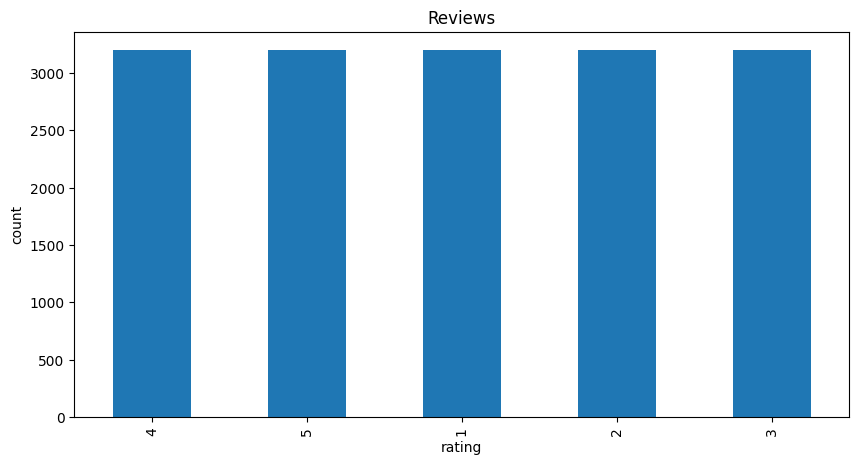

In [ ]:
reviews = df['Score'].value_counts()
reviews.plot(kind='bar',title='Reviews', figsize=(10, 5))
plt.xlabel('rating')
plt.ylabel('count')

plt.show()

# Algorithm Selection

In [ ]:
p_grd_1 = {
    'hidden_layer_sizes' : [(50,)],
    'activation' : ['relu'],
    'solver' : ['adam'],
    'alpha' : [0.1]
}

mdl_1 = sklearn.model_selection.GridSearchCV(sklearn.neural_network.MLPClassifier(), p_grd_1, scoring='accuracy', cv=5, n_jobs=-1)
mdl_1.fit(x_train, y_train)
print('accuracy = {:.2f}'.format(mdl_1.best_score_))
print('effective hyperparameters of MLP = {}'.format(mdl_1.best_params_))

accuracy = 0.31
effective hyperparameters of MLP = {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50,), 'solver': 'adam'}


In [ ]:
p_grd_2 = {
     'n_estimators': [100],
     'criterion': ['friedman_mse'],
     'max_depth': [3],
     'learning_rate': [0.1],
     'subsample': [1.0],
     'min_samples_split': [2],
     'min_samples_leaf': [1],
     'max_features': [None]
}

mdl_2 = sklearn.model_selection.GridSearchCV(sklearn.ensemble.GradientBoostingClassifier(), p_grd_2, scoring='accuracy', cv=5, n_jobs=-1)
mdl_2.fit(x_train, y_train)
print('accuracy = {:.2f}'.format(mdl_2.best_score_))
print('effective hyperparameters of GBC = {}'.format(mdl_2.best_params_))

accuracy = 0.65
effective hyperparameters of GBC = {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}


In [ ]:
p_grd_3 = {
     'criterion': ['gini'],
     'max_depth': [None],
     'min_samples_split': [2],
     'min_samples_leaf': [1],
     'max_features': [None],
     'random_state': [None]
}

mdl_3 = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(), p_grd_3, scoring='accuracy', cv=5, n_jobs=-1)
mdl_3.fit(x_train, y_train)
print('accuracy = {:.2f}'.format(mdl_3.best_score_))
print('effective hyperparameters of DTC = {}'.format(mdl_3.best_params_))

accuracy = 0.49
effective hyperparameters of DTC = {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': None}


In [ ]:
p_grd_4 = {
    'n_estimators': [51],
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

mdl_4 = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), p_grd_4, scoring='accuracy', cv=5, n_jobs=-1)
mdl_4.fit(x_train, y_train)


print('accuracy = {:.2f}'.format(mdl_4.best_score_))
print('effective hyperparameters of XGB = {}'.format(mdl_4.best_params_))

accuracy = 0.65
effective hyperparameters of XGB = {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 51}


Aside from the algorithms listed above, I test several more. However, the performance is not improved. As a result, I'm displaying the best-performing algorithms. I have used GridSearch method to find best algortithm.

In [ ]:
y_predict = mdl_2.predict(x_test)
cm = sklearn.metrics.confusion_matrix(y_test, y_predict)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predict)
precision, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(y_test, y_predict)
print('accuracy =',accuracy)
print('precision =', precision)
print('recall =', recall)
print('support =', support)
print('f1 = ', f1)


accuracy = 0.656
precision = [0.4        0.         0.11111111 0.         0.6827957 ]
recall = [0.24691358 0.         0.01388889 0.         0.97692308]
support = [ 81  52  72 145 650]
f1 =  [0.30534351 0.         0.02469136 0.         0.80379747]


GradientBoostingClassifier was chosen because it provides greater accuracy, precision, recall, and support score than other algorithms.

I built an NLP pipeline to determine the sentiment of customer reviews and predict product ratings. I worked on tasks such as loading data, data preprocessing, NLTK tagging, sentiment analysis, splitting data, balancing data, algorithm selection, and hyperparameter tuning and prediction in this pipeline.